<a href="https://colab.research.google.com/github/Rahulxz/super-winner/blob/main/Amazon_prime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?

Regional Availability: How does content distribution vary across different regions?

Trends Over Time: How has Amazon Prime’s content library evolved?

IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **DATA SET Links**
Credits: https://drive.google.com/file/d/15T5Du-Yg_PxAjYWxf6-xJqzznX0Kf1DA/view?usp=sharing

Titles:https://drive.google.com/file/d/1sfJ1Q52v9JaLPuAlYtW-uOV3ASwrweV4/view?usp=sharing


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
credits=pd.read_csv("/content/drive/MyDrive/Amazom_Data_Assignment/credits.csv")
title=pd.read_csv("/content/drive/MyDrive/Amazom_Data_Assignment/titles.csv")
#title
title['genres'] = title['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
title.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [15]:
title.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


In [12]:
title.dropna(inplace=True)

In [13]:
title.isnull().sum()


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [ ]:
credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [17]:
df=pd.merge(credits,title,on="id")

In [18]:
df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"[action, drama, war, western, comedy, european]",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"[action, drama, war, western, comedy, european]",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [19]:
new=title.explode('genres')
new.sort_values("tmdb_popularity",ascending=False,inplace=True)
popular=new.groupby("genres")["tmdb_popularity"].mean().sort_values(ascending=False)
new_pop=pd.DataFrame(popular)
top_6=new_pop.head(6)
#new.head()


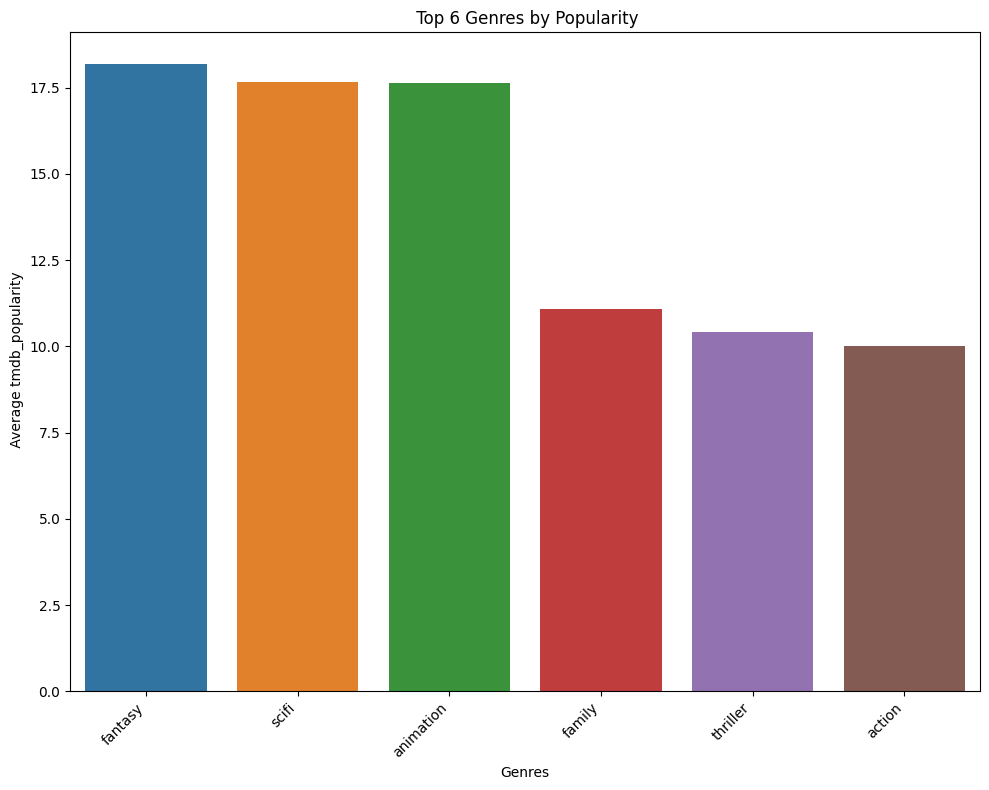

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x='genres',y='tmdb_popularity',data=top_6,hue="genres")
plt.title(" Top 6 Genres by Popularity")
plt.xlabel("Genres")
plt.ylabel(" Average tmdb_popularity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Insights**
**Most Popular genres among all are:**

1.Fantasy

2.Sci-Fi

3.Animation

4.Family

5.Thriller

6.Action

In [21]:
title['production_countries'] = title['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
new=title.explode('production_countries')
country_counts = new['production_countries'].value_counts().reset_index()
country_counts.columns = ['production_countries', 'count']
country_counts.sort_values("count",ascending=False,inplace=True)
# Select top N countries (e.g., top 10)
top_6 = country_counts.head()



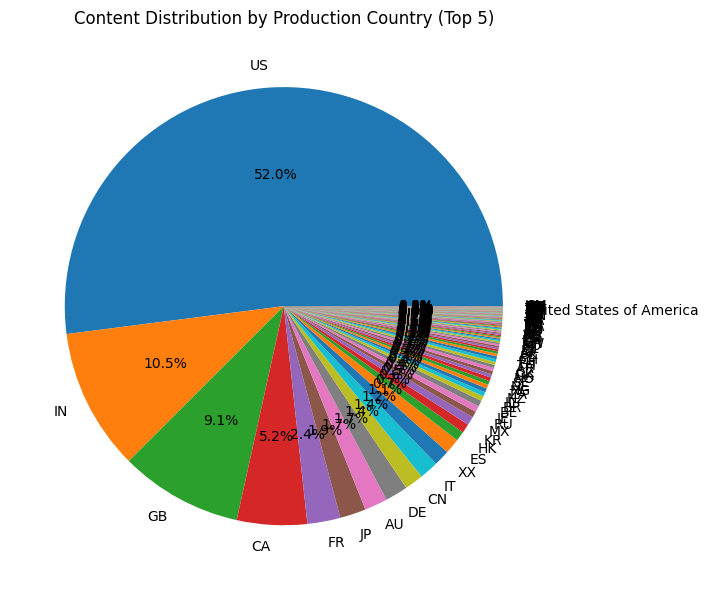

In [22]:
plt.figure(figsize=(12, 6)) # Adjust figure size if needed
plt.pie('count',labels='production_countries', data=country_counts,autopct='%1.1f%%')
plt.title('Content Distribution by Production Country (Top 5)')
#plt.xlabel('Production Country')
#plt.ylabel('Number of Titles')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# **Insights**
Looking at the production pie chart:

USA has approximately 52% of dataframe movies produced

On second number is India with appox. 10.5% movies produced

The Third spot taken by GB which had 9.1% approx movies produced.

Note: Cluttered graph so need to break it further.


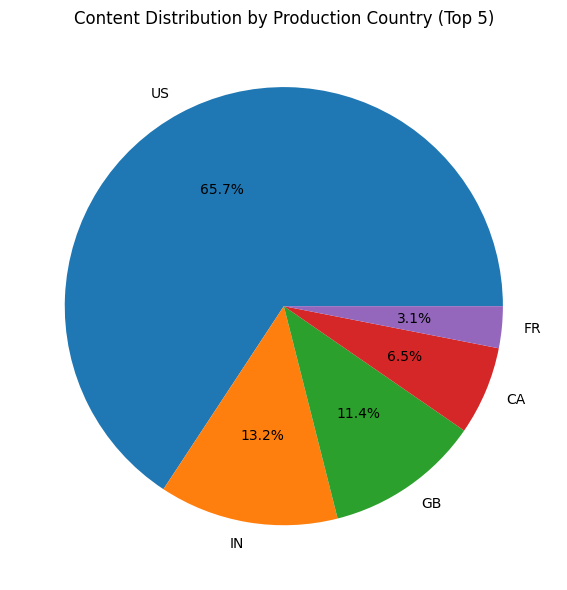

In [23]:
plt.figure(figsize=(12, 6)) # Adjust figure size if needed
plt.pie('count',labels='production_countries', data=top_6,autopct='%1.1f%%')
plt.title('Content Distribution by Production Country (Top 5)')
#plt.xlabel('Production Country')
#plt.ylabel('Number of Titles')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# **Insights**
To make it more clear we have plotted another graph consisting only top5 countries.

1.US approx 65.7% amongst top5

2.IN approx 13.2%

3.GB approx 11.4%

4.CA approx 6.5%

5.FR approx 3.1%

In [24]:
#new
trend=new["genres"].value_counts().reset_index()
trend.columns=["genres","count"]
trend.sort_values("count",ascending=False,inplace=True)

In [25]:
# Determine earliest and latest release years
earliest_year = new['release_year'].min()
latest_year = new['release_year'].max()
print(f"\nEarliest release year: {earliest_year}")
print(f"Latest release year: {latest_year}")


Earliest release year: 1912
Latest release year: 2022


In [27]:
title['genres'] = title['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
new=title.explode('genres')
latest=new[new["release_year"]<=2019]
new_trend=latest.groupby("release_year")["genres"].value_counts().sort_values(ascending=False)
new_trend=pd.DataFrame(new_trend)
new_trend.head()


,,count
release_year,genres,
2019,drama,393
2018,drama,316
2017,drama,284
2019,comedy,246
2016,drama,235


In [28]:
# Extract release year from the 'release_year' column
#new['release_year'] = pd.to_datetime(new['release_year'], errors='coerce').dt.year
#genre_trends = new.groupby(['release_year', 'genres'])['id'].count().reset_index(name='count')
#top=genre_trends.sort_values("count",ascending=False)
#genre_trends



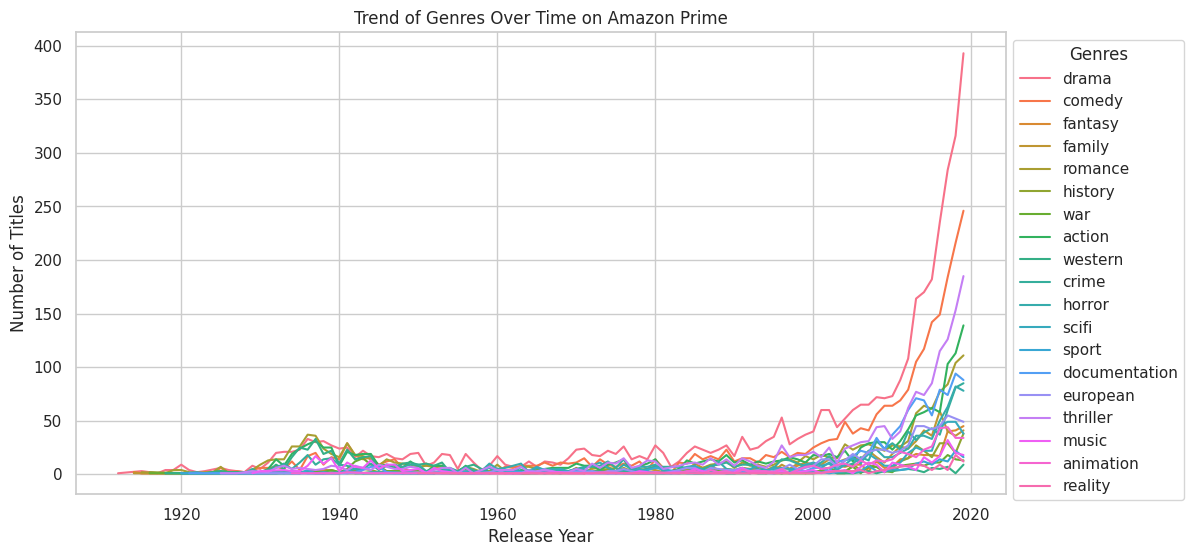

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(data=new_trend, x='release_year', y='count', hue='genres')
plt.title('Trend of Genres Over Time on Amazon Prime')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genres', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# **Insights**
If we see the graph it is clear that in the last 2 decades since 2000 - 2020

The Trend as follows:

1.Drama genre had highest number of movies being made.

2. Then comes Comedy.

3. Then is Thriller

4. Behind them was Action


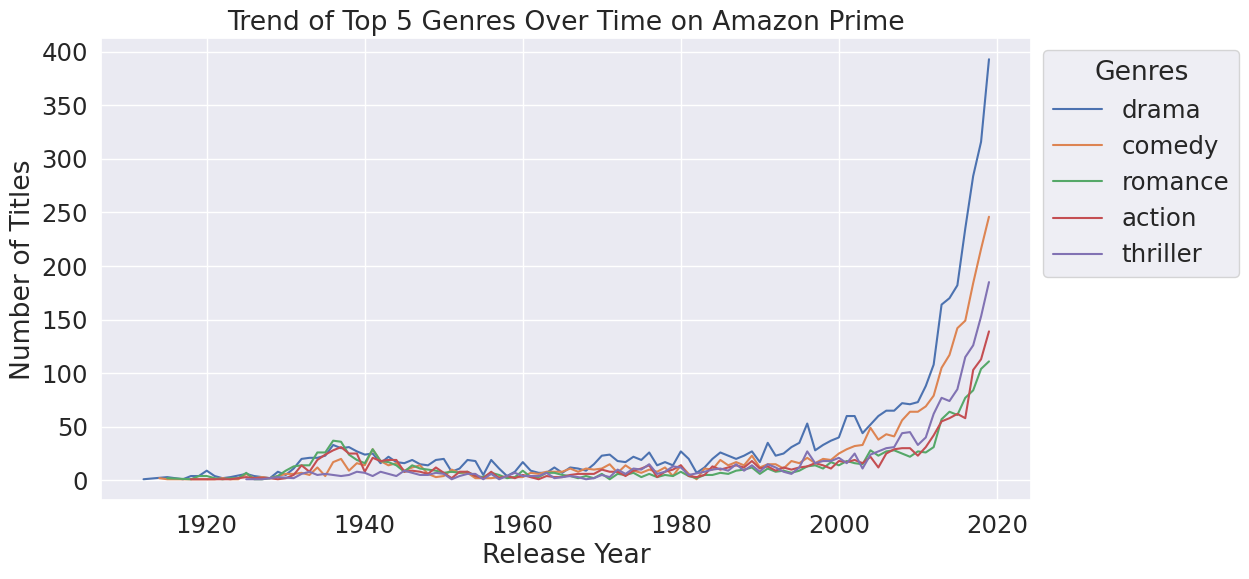

In [39]:
latest = new[new["release_year"] <= 2019]
new_trend = latest.groupby("release_year")["genres"].value_counts().reset_index(name="count")

# Get the top 5 genres
top_genres = new_trend.groupby('genres')['count'].sum().sort_values(ascending=False).head(5).index.tolist()
filtered_new_trend = new_trend[new_trend['genres'].isin(top_genres)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_new_trend, x='release_year', y='count', hue='genres')
plt.title('Trend of Top 5 Genres Over Time on Amazon Prime')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genres', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# **Insights**
For better clarity I have plotted the trend line graph for only the top 5 genres:

1.Drama

2.Comedy

3.Thriller

4.Action

5.Romance

                                 title  imdb_score
9135                        Pawankhind         9.9
7783         Water Helps the Blood Run         9.7
9108                 Couple of Mirrors         9.5
7422                        The Chosen         9.4
9423                        Tari Sathe         9.4
9052                          Jai Bhim         9.3
9573                 Pazhagiya Naatkal         9.3
5113             Subaru Launch Control         9.3
9741  Strictly for the Streets: Vol 1.         9.2
1159                    Free to Choose         9.2


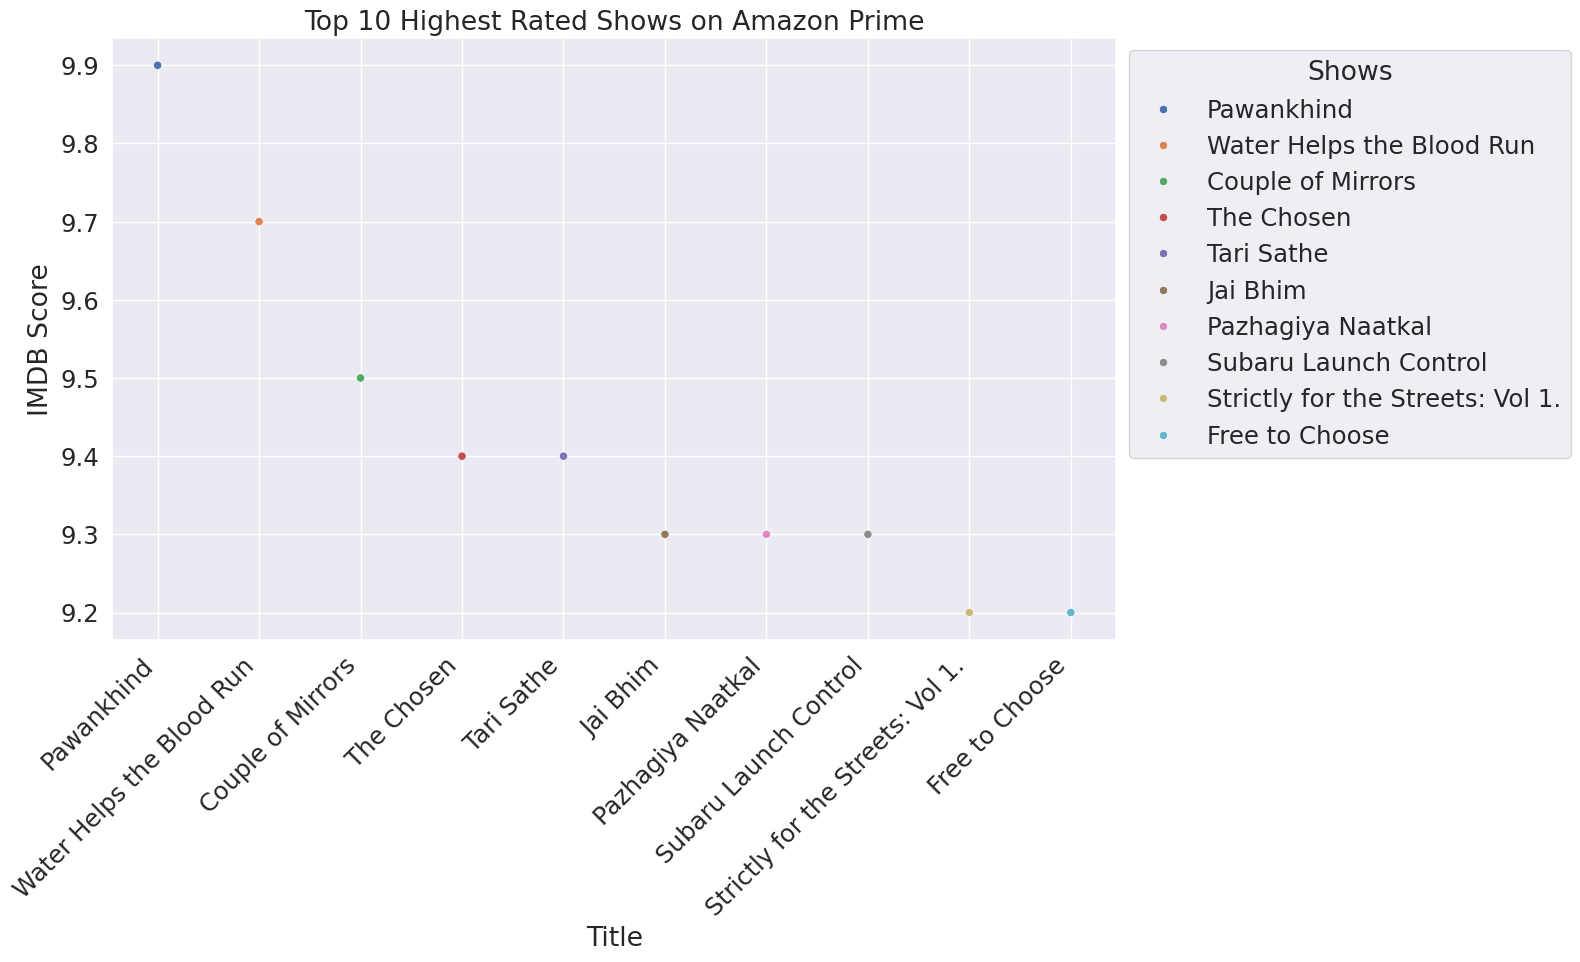

In [42]:
highest_rated = title.sort_values(by=['imdb_score'], ascending=False).head(10)  # Top 10 highest-rated shows
print(highest_rated[['title', 'imdb_score']])
plt.figure(figsize=(16, 10))
sns.scatterplot(x='title',y='imdb_score',data=highest_rated,hue='title')
plt.xlabel("Title")
plt.ylabel("IMDB Score")
plt.title("Top 10 Highest Rated Shows on Amazon Prime")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Shows', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

                                  title  tmdb_popularity
8934                 All the Old Knives         1437.906
9040                             Harina          951.863
9039                  The eighth clause          950.986
8964  Hotel Transylvania: Transformania          934.545
7421                 Sonic the Hedgehog          893.650
8948           Clifford the Big Red Dog          482.744
9092                    Queen of Spades          429.802
9011                            Meander          389.431
4099                              Suits          356.533
5287                   Better Call Saul          352.657


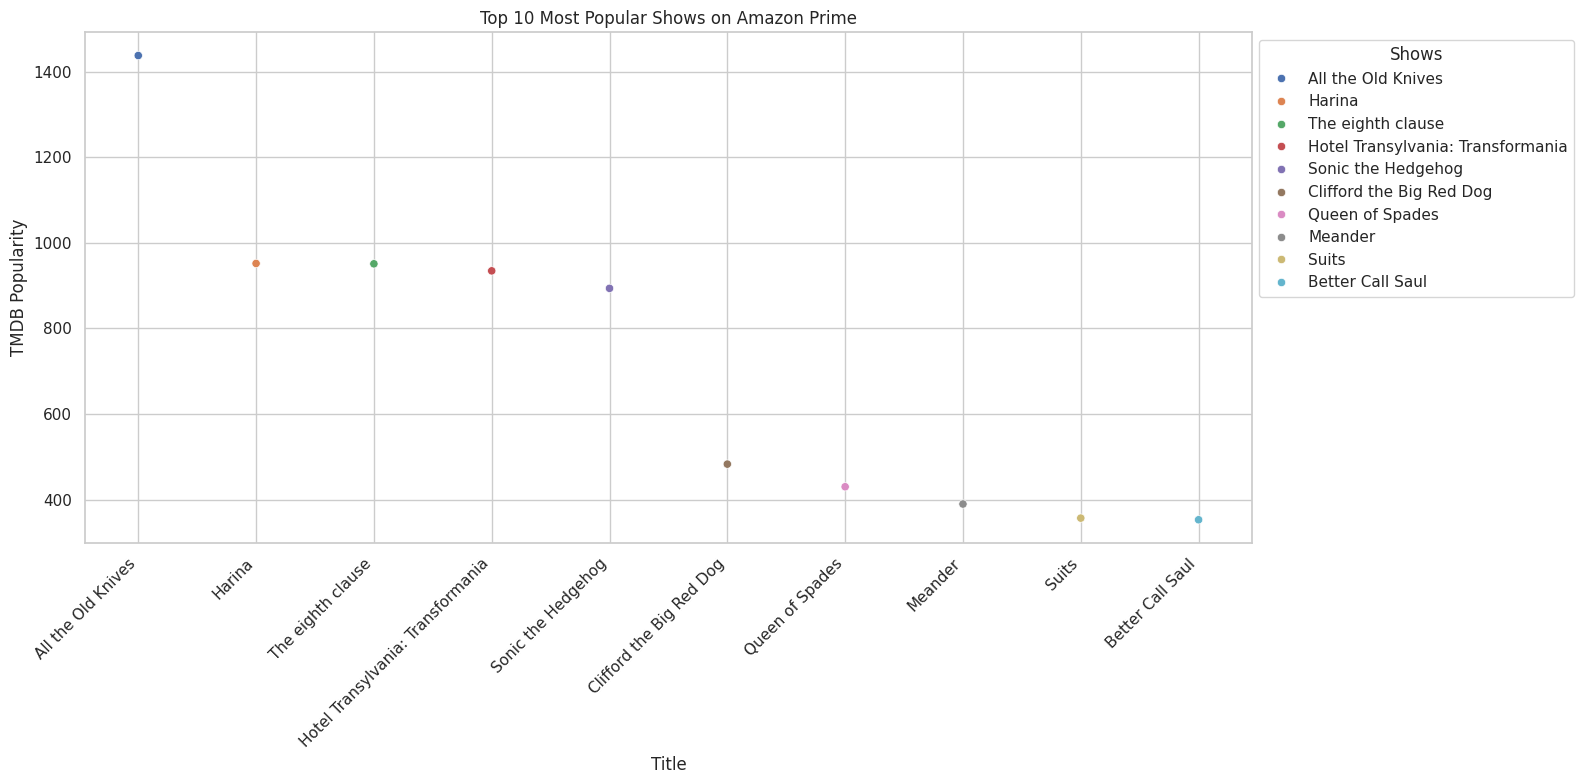

In [48]:
popular=title.sort_values(by=['tmdb_popularity'],ascending=False).head(10)
print(popular[['title','tmdb_popularity']])
plt.figure(figsize=(16, 8))
sns.scatterplot(x='title',y='tmdb_popularity',data=popular,hue='title')
plt.xlabel("Title")
plt.ylabel("TMDB Popularity")
plt.title("Top 10 Most Popular Shows on Amazon Prime")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Shows', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()